# Midhun Kandakatla

#### @bearcats https://twitter.com/bearcatsports
#### @Royals https://twitter.com/Royals
#### @OmahaWBB https://twitter.com/OmahaWBB

In [ ]:
# Twitter
import pickle
import tweepy
from twitter_keys import consumer_key,consumer_secret,access_token,access_secret
import pickle

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api=tweepy.API(auth)
public_tweets=api.user_timeline('bearcatsports')
with open('admissions.pkl','wb') as f:
    pickle.dump(public_tweets,f)
public_tweets=api.user_timeline('Royals')
with open('athletics.pkl','wb') as f:
    pickle.dump(public_tweets,f)
public_tweets=api.user_timeline('OmahaWBB')
with open('police.pkl','wb') as f:
    pickle.dump(public_tweets,f)

In [38]:
with open('admissions.pkl','rb') as f:

    public_tweets1 = pickle.load(f)


with open('athletics.pkl','rb') as f:

    public_tweets2 = pickle.load(f)


with open('police.pkl','rb') as f:

    public_tweets3 = pickle.load(f)



#### The below code calculates lexical diversity and also stores the location information.

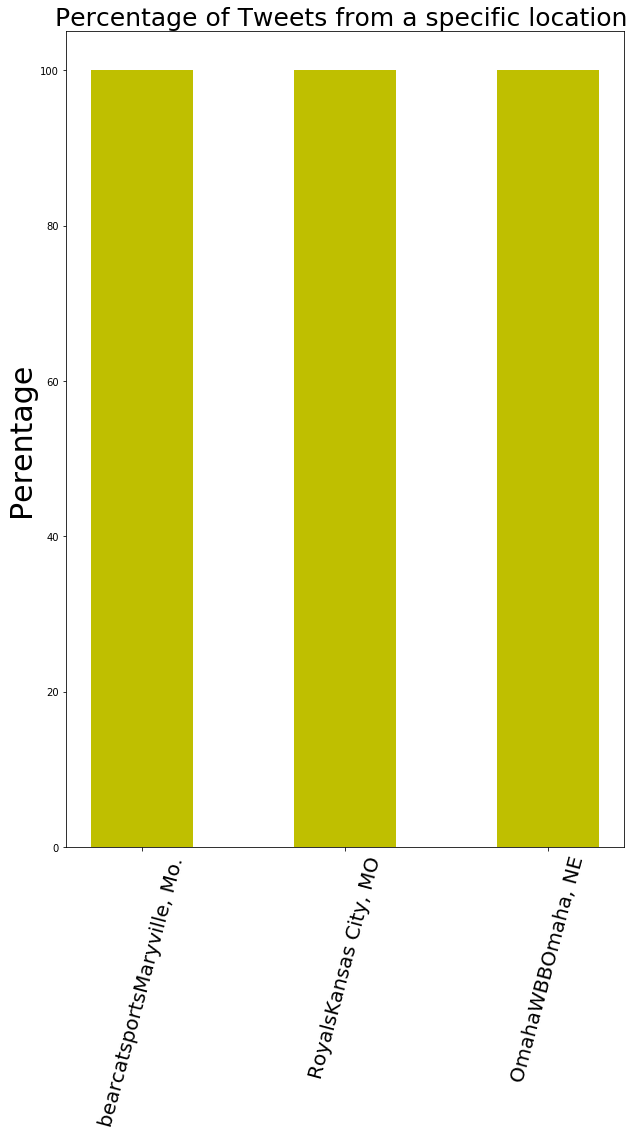

In [63]:
def Lexical_Diversity(text):
    tokens=text.lower().split()
    return len(set(tokens))/len(tokens)
#print('***************************************')
diversities1=[]
Locations1 = []
for tweet in public_tweets1:
    diversities1.append(Lexical_Diversity(tweet.text))
    Locations1.append(tweet.author.location)
#print(Locations1)
Locations2 = []

#print(diversities1)
diversities2=[]
for tweet in public_tweets2:
    diversities2.append(Lexical_Diversity(tweet.text))
    Locations2.append(tweet.author.location)
#print(Locations2)
Locations3 = []

#print(diversities2)

diversities3=[]
for tweet in public_tweets3:
    diversities3.append(Lexical_Diversity(tweet.text))
    Locations3.append(tweet.author.location)
#print(Locations3)


locations = {}
for location in set(Locations1):
    locations['bearcatsports'+ location] = Locations1.count(location)*100/20
for location in set(Locations2):
    locations['Royals'+ location] = Locations2.count(location)*100/20
for location in set(Locations3):
    locations['OmahaWBB'+ location] = Locations3.count(location)*100/20



# The below code plots histogram of percentage of tweets from specific loation
import matplotlib.pyplot as plt
heights = list(locations.values())
heights.sort(reverse=True)
plt.subplots(figsize=(10,15))
plt.bar(range(len(heights)),heights,width=0.5,color ='y')
plt.title("Percentage of Tweets from a specific location ",fontsize=25)
plt.ylabel("Perentage",fontsize=30)
keys = list(locations.keys())
keys.sort(reverse=True, key = lambda x: locations[x])
plt.xticks(range(len(heights)),keys,rotation=75, fontsize=20)
plt.show()




### From the above graph we can conclude that 100% of @bearcatsports tweets are from Maryville(MO),100% of tweets of @Royals tweets are from Kansas city(M0) and 100% of tweets of @OmahaWBB tweets are from Omaha(NE).

## The code below depicts histogram of Average Lexical diversity

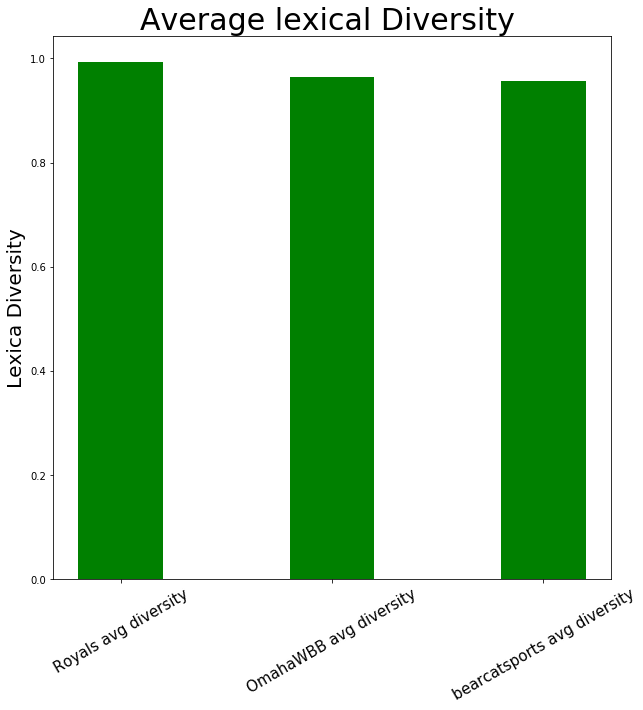

In [61]:


import statistics
# Create a dictionary and store average lexical diversity of all accounts in the dictionary
avg__lexical_diversities = {}
avg__lexical_diversities['bearcatsports avg diversity']= statistics.mean(diversities1)
avg__lexical_diversities['Royals avg diversity']= statistics.mean(diversities2)
avg__lexical_diversities['OmahaWBB avg diversity']= statistics.mean(diversities3)

# Plot a histogram from the average lexical divsersity dictionary

import matplotlib.pyplot as plot
heights = list(avg__lexical_diversities.values())
heights.sort(reverse=True)
plot.subplots(figsize=(10,10))
plot.bar(range(len(heights)),heights,width=0.4,color ='g')
plot.title("Average lexical Diversity ",fontsize=30)
plot.ylabel("Lexica Diversity",fontsize=20)
keys = list(avg__lexical_diversities.keys())
keys.sort(reverse=True, key = lambda x: avg__lexical_diversities[x])
plot.xticks(range(len(heights)),keys,rotation=30, fontsize=15)
plot.show()


## From the above graph we can idenyify that @Royals have the  highest lexical diversity average and @OmahaWBB stands second in average lexical diversity while  @bearcatsports has the lowest lexical diversity average among all the three twitter accounts.